In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/Netflix Dataset.csv')
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [3]:
df.shape
df.info()
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
count,7789,7789,7789,5401,7071,7282,7779,7782,7789,7789,7789
unique,7787,2,7787,4050,6831,681,1565,14,216,492,7769
top,s6621,Movie,The Lost Okoroshi,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,2,5379,2,18,18,2556,118,2865,1608,334,3


In [4]:
# Check missing data
df.isnull().sum()

# Fill or drop based on column importance
df['Director'].fillna('Not Available', inplace=True)
df['Cast'].fillna('Not Available', inplace=True)
df['Country'].fillna('Unknown', inplace=True)
df.dropna(subset=['Release_Date'], inplace=True)


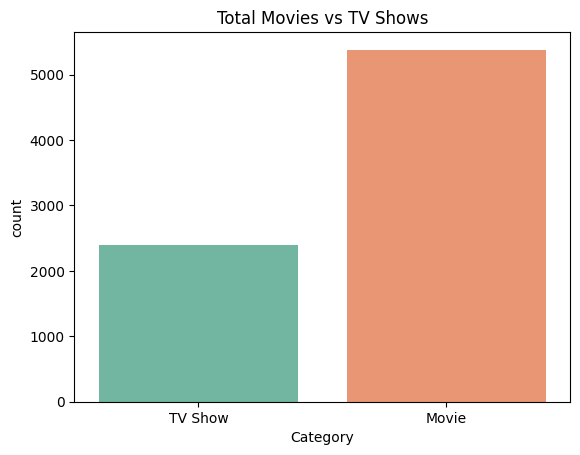

In [7]:
sns.countplot(x='Category', data=df, palette='Set2')
plt.title("Total Movies vs TV Shows")
plt.show()

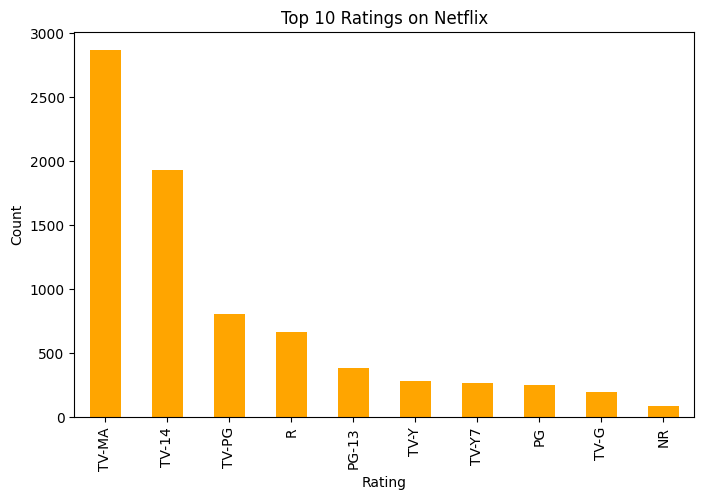

In [8]:
plt.figure(figsize=(8,5))
df['Rating'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title("Top 10 Ratings on Netflix")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

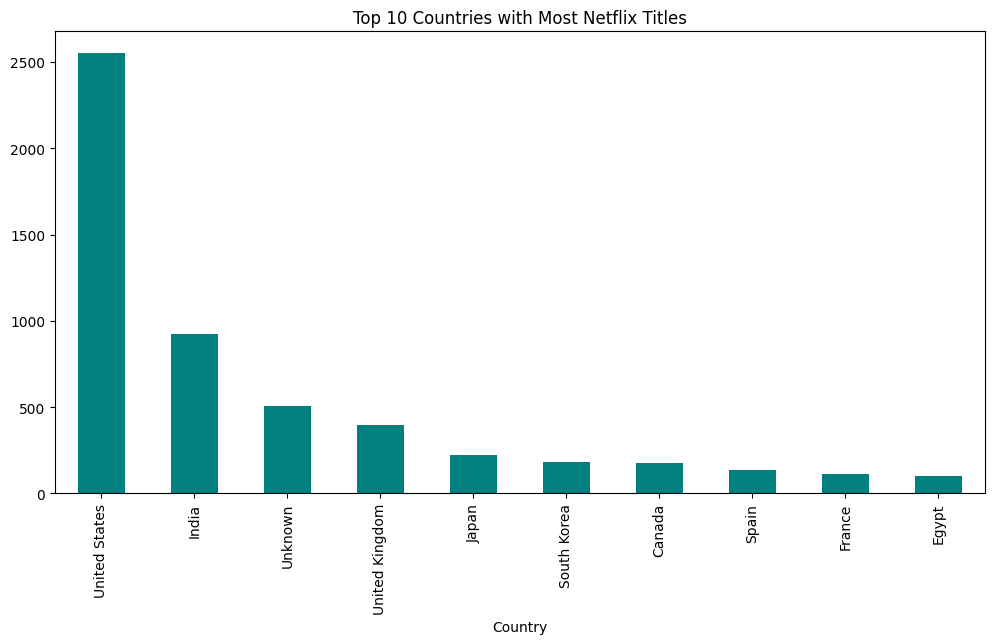

In [9]:
plt.figure(figsize=(12,6))
df['Country'].value_counts().head(10).plot(kind='bar', color='teal')
plt.title("Top 10 Countries with Most Netflix Titles")
plt.show()

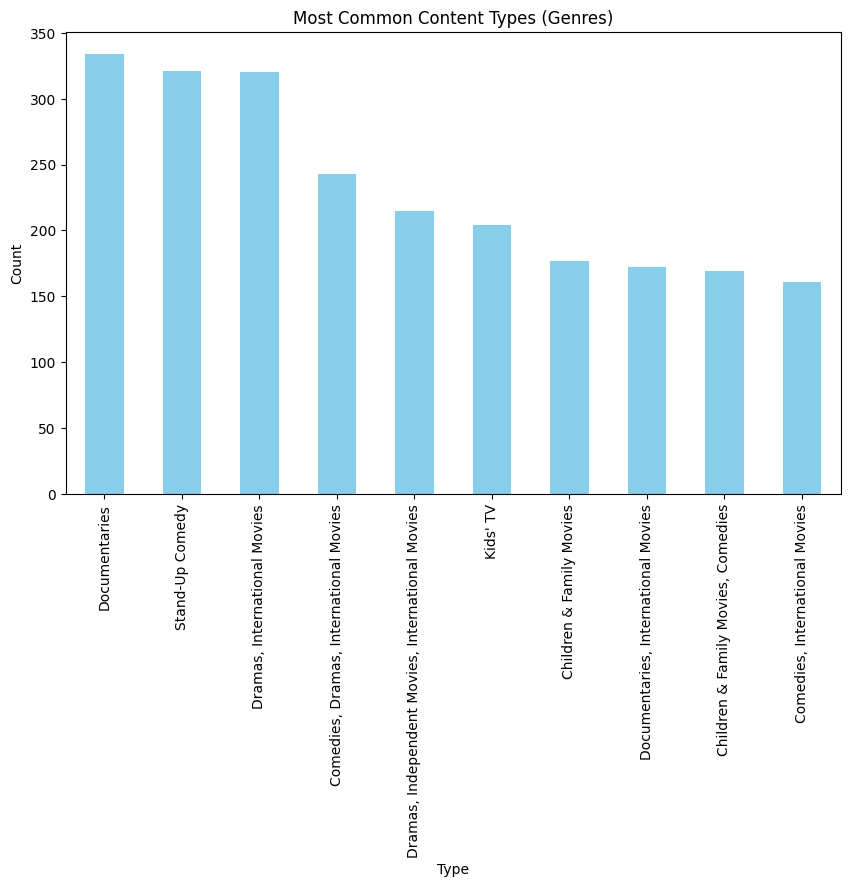

In [11]:
plt.figure(figsize=(10,6))
df['Type'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title("Most Common Content Types (Genres)")
plt.ylabel("Count")
plt.show()

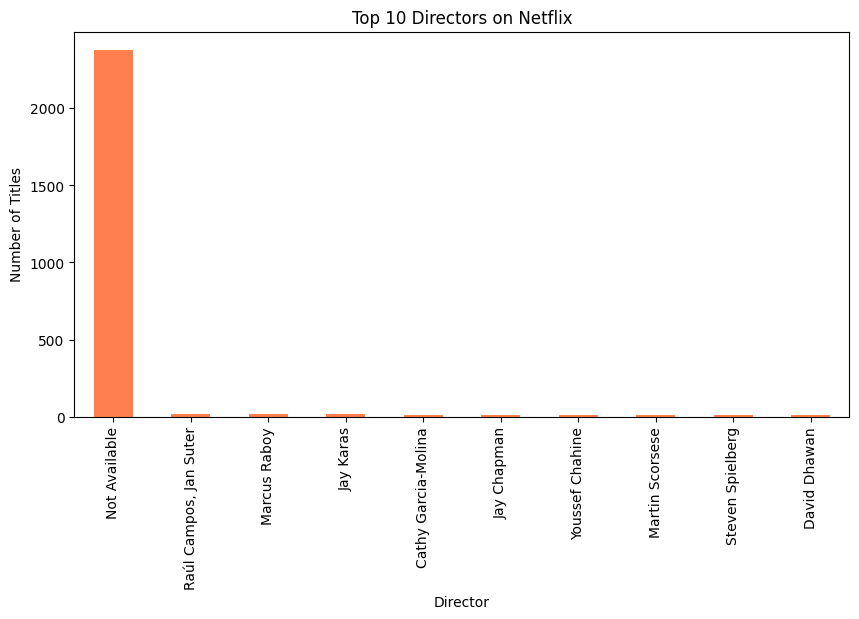

In [12]:
plt.figure(figsize=(10,5))
df['Director'].value_counts().head(10).plot(kind='bar', color='coral')
plt.title("Top 10 Directors on Netflix")
plt.ylabel("Number of Titles")
plt.show()

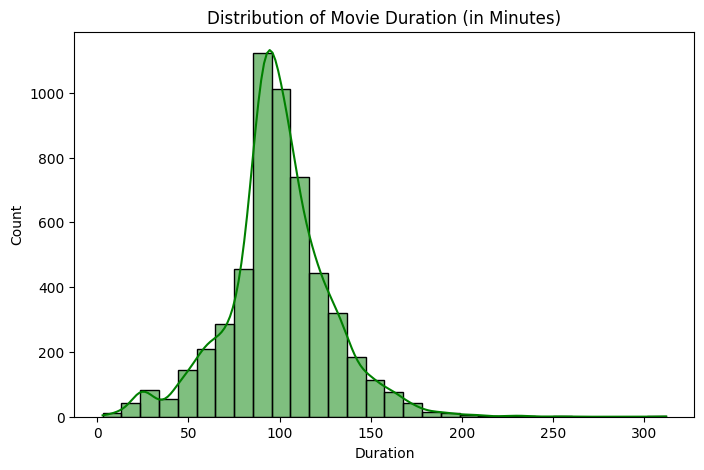

In [13]:
movies_df = df[df['Category'] == 'Movie']
movies_df['Duration'] = movies_df['Duration'].str.replace(' min','').astype(float)
plt.figure(figsize=(8,5))
sns.histplot(movies_df['Duration'], bins=30, kde=True, color='green')
plt.title("Distribution of Movie Duration (in Minutes)")
plt.show()

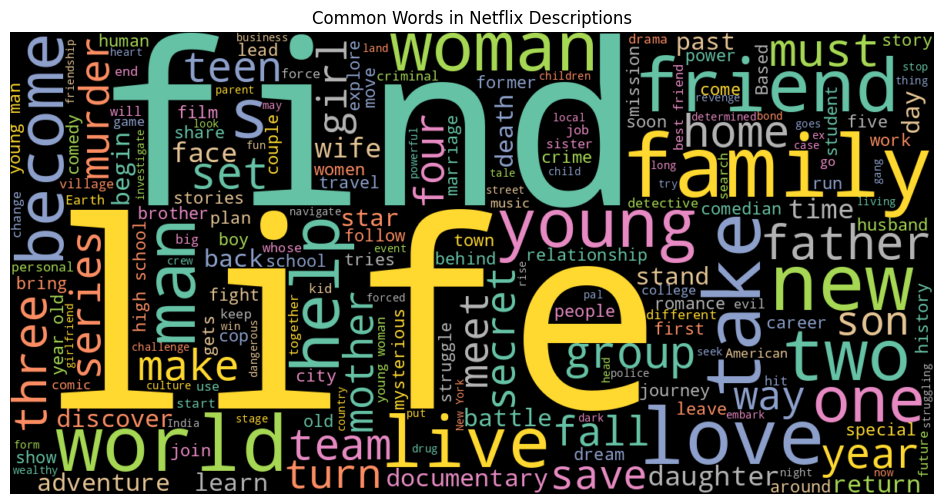

In [14]:
from wordcloud import WordCloud

text = ' '.join(df['Description'].astype(str))
wordcloud = WordCloud(width=1200, height=600, background_color='black', colormap='Set2').generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Common Words in Netflix Descriptions")
plt.show()